In [2]:
from PIL import Image
import cv2
import pytesseract

In [3]:
from matplotlib import pyplot as plt

In [31]:
# img=Image.open("data/1.jpg")
img=Image.open("data/lab_img_num.jpg")

In [32]:
print(img)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=363x235 at 0x1BBD5E82070>


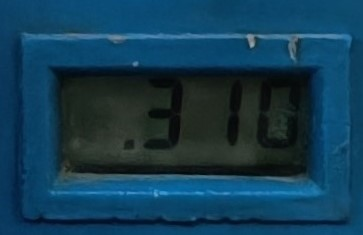

In [33]:
display(img)

In [28]:
text=pytesseract.image_to_string(img)

In [29]:
print(text)

133

 



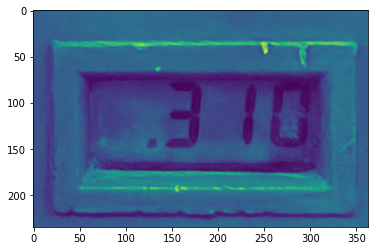

In [49]:
# img=cv2.imread("data/1.jpg")
img=cv2.imread("data/lab_img_num.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

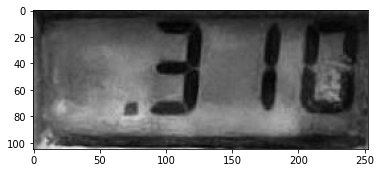

In [69]:
img_n=img[70:,55:]
img_n=img_n[:-60,:-55]
plt.imshow(img_n)
gray_n = cv2.cvtColor(img_n, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_n, cmap='gray')
# black_n = cv2.threshold(gray_n, 127, 255, cv2.THRESH_BINARY)[1]
# plt.imshow(black_n, cmap='gray')

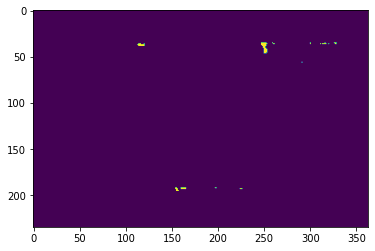

In [44]:
# black = cv2.threshold(gray, 125, 255, cv2.THRESH_BINARY)[1]
# plt.imshow(black)

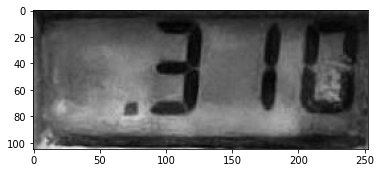

In [72]:
blur = cv2.GaussianBlur(gray_n, (1,1), 0)
plt.imshow(blur, cmap='gray')

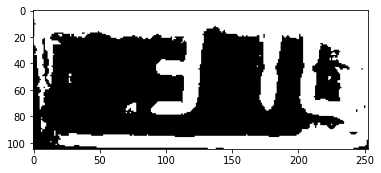

In [73]:
thresh = cv2.threshold(blur, 0, 10, cv2.THRESH_BINARY_INV +  cv2.THRESH_OTSU)[1]

plt.imshow(thresh, cmap='gray')

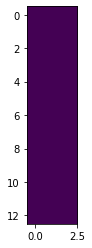

In [19]:
kernal = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 13))
plt.imshow(kernal)

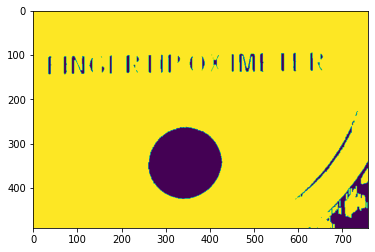

In [20]:
dilate = cv2.dilate(thresh, kernal, iterations=1)
plt.imshow(dilate)

In [22]:
image=img.copy()

In [23]:
# cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cents[1]
cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])
for c in cnts:
    print("inside loop")
    x, y, w, h = cv2.boundingRect(c)
    print(x,y,w,h)
    cv2.rectangle(image, (x, y), (x+w, y+h), (36, 255, 12), 2)
#     if h > 200 and w > 20:
# #         roi = image[y:y+h, x:x+h]
# #         cv2.imwrite("temp/index_roi.png", roi)
#         cv2.rectangle(image, (x, y), (x+w, y+h), (36, 255, 12), 2)
cv2.imwrite("temp/index_bbox_new.png", image)


inside loop
0 141 2 16
inside loop
0 0 758 491
inside loop
629 474 25 17
inside loop
641 480 1 1
inside loop
645 478 27 13
inside loop
647 474 1 1
inside loop
654 466 8 7
inside loop
662 463 3 3
inside loop
666 460 4 4
inside loop
671 490 1 1
inside loop
671 483 1 1
inside loop
671 471 1 2
inside loop
672 457 1 1
inside loop
673 483 1 1
inside loop
674 455 1 1
inside loop
675 486 1 2
inside loop
678 451 1 1
inside loop
679 488 3 1
inside loop
680 450 1 1
inside loop
682 449 1 1
inside loop
685 445 1 1
inside loop
688 442 1 1
inside loop
692 451 1 2
inside loop
694 451 3 3
inside loop
694 435 1 1
inside loop
706 421 44 38
inside loop
709 419 2 2
inside loop
714 458 2 2
inside loop
714 427 1 1
inside loop
715 408 1 1
inside loop
716 456 1 1
inside loop
717 459 3 3
inside loop
719 407 2 2
inside loop
721 418 1 1
inside loop
722 420 1 2
inside loop
722 415 2 2
inside loop
723 442 1 1
inside loop
725 408 5 8
inside loop
731 402 1 6
inside loop
733 436 1 1
inside loop
734 434 1 1
inside loop

True

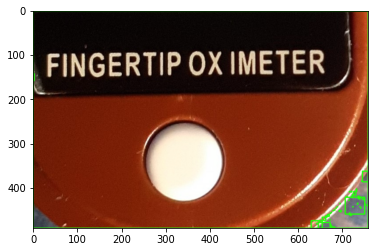

In [24]:
img_bb=cv2.imread("temp/index_bbox_new.png")
plt.imshow(image)
# plt.imshow(img_bb)